## MARKET BASKET ANALYSIS

## Using the Apriori Algorithm

In [34]:
# a - Importing libraries and loading dataset to be used

# a1. Importing needed libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# a2. Loading the dataset

df = pd.read_csv("Market Basket Analysis - Groceries_dataset.csv")
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [3]:
# b. Exploring the dataset
# i.

df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [4]:
# b. Exploring the dataset
# ii.

df.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


In [5]:
# b. Exploring the dataset
# iii.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [6]:
# Checking for null values 
# iv.

df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [7]:
# c - Preparing the dataset for analysis

# c1. Converting a column 'data object' format 

df['Member_number'] = df['Member_number'].astype("string")
df['Member_number'].dtype

string[python]

In [8]:
df['Date'] = df['Date'].astype("string")
df['Date'].dtype

string[python]

In [9]:
# c2. Checking to confirm conversion of 'data object' format is done

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  string
 1   Date             38765 non-null  string
 2   itemDescription  38765 non-null  object
dtypes: object(1), string(2)
memory usage: 908.7+ KB


In [10]:
# c3. Creating a new column, 'uniqueTransaction' to group 2 nos. columns in 1

df['uniqueTransaction'] = df['Member_number'] + '_' + df['Date']
df['uniqueTransaction']

0        1808_21-07-2015
1        2552_05-01-2015
2        2300_19-09-2015
3        1187_12-12-2015
4        3037_01-02-2015
              ...       
38760    4471_08-10-2014
38761    2022_23-02-2014
38762    1097_16-04-2014
38763    1510_03-12-2014
38764    1521_26-12-2014
Name: uniqueTransaction, Length: 38765, dtype: string

In [11]:
# c4. Exploring the dataset to confirm addition of new column

df.head()

,Member_number,Date,itemDescription,uniqueTransaction
0,1808,21-07-2015,tropical fruit,1808_21-07-2015
1,2552,05-01-2015,whole milk,2552_05-01-2015
2,2300,19-09-2015,pip fruit,2300_19-09-2015
3,1187,12-12-2015,other vegetables,1187_12-12-2015
4,3037,01-02-2015,whole milk,3037_01-02-2015


In [12]:
# c5. Creating a table to represent frequency of unique items using cross tabulation.

# Converting the purchase items into columns and transactions into rows

new_df = pd.crosstab(df['uniqueTransaction'], df['itemDescription'])
new_df.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
uniqueTransaction,,,,,,,,,,,,,,,,,,,,,
1000_15-03-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1000_24-06-2014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000_24-07-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_25-11-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_27-05-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# d. Pre-processing the data with binary encoding; converting the data values to 1s(ones) and 0s(zeros)

def encoded_item_values(i):
    if i <= 0:
        return 0
    if i >= 1:
        return 1
        
basket_items = new_df.applymap(encoded_item_values)

basket_items

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
uniqueTransaction,,,,,,,,,,,,,,,,,,,,,
1000_15-03-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1000_24-06-2014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000_24-07-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_25-11-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_27-05-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999_24-01-2015,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4999_26-12-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5000_09-03-2014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# e - Implementing the Apriori algorithm; another alternative for pruning and filtering itemsets in order to identify useful rules

from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import apriori

# e1. Computing frequent purchase items; capturing the Apriori principle

frequent_purchase_items = apriori(basket_items, min_support = 0.005, use_colnames = True)
frequent_purchase_items

C:\Users\chris\AppData\Roaming\Python\Python310\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.021386,(UHT-milk)
1,0.008087,(baking powder)
2,0.033950,(beef)
3,0.021787,(berries)
4,0.016574,(beverages)
...,...,...
121,0.011629,"(whole milk, soda)"
122,0.005814,"(yogurt, soda)"
123,0.008220,"(tropical fruit, whole milk)"
124,0.005213,"(tropical fruit, yogurt)"


In [15]:
# e2. Checking the number (frequent_purchase_items)

len(frequent_purchase_items)

126

In [16]:
# f. Computing the association rules for frequent_purchase_items with the data (binary encoded)

# f1. Using the first metric (Support)

frequent_purchase_items_ar = association_rules(frequent_purchase_items, metric = "support", min_threshold = 0 )
frequent_purchase_items_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(bottled beer),(whole milk),0.045312,0.157923,0.007151,0.157817,0.999330,-0.000005,0.999874,-0.000702
1,(whole milk),(bottled beer),0.157923,0.045312,0.007151,0.045281,0.999330,-0.000005,0.999968,-0.000795
2,(bottled water),(other vegetables),0.060683,0.122101,0.005480,0.090308,0.739619,-0.001929,0.965051,-0.272617
3,(other vegetables),(bottled water),0.122101,0.060683,0.005480,0.044882,0.739619,-0.001929,0.983457,-0.286230
4,(whole milk),(bottled water),0.157923,0.060683,0.007151,0.045281,0.746196,-0.002432,0.983868,-0.287708
...,...,...,...,...,...,...,...,...,...,...
69,(whole milk),(tropical fruit),0.157923,0.067767,0.008220,0.052052,0.768108,-0.002482,0.983422,-0.263904
70,(tropical fruit),(yogurt),0.067767,0.085879,0.005213,0.076923,0.895720,-0.000607,0.990298,-0.111019
71,(yogurt),(tropical fruit),0.085879,0.067767,0.005213,0.060700,0.895720,-0.000607,0.992477,-0.112970
72,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638,-0.203508


In [17]:
# f2. Exploring the top 5 rules with Support metric

frequent_purchase_items_ar.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(bottled beer),(whole milk),0.045312,0.157923,0.007151,0.157817,0.999330,-0.000005,0.999874,-0.000702
1,(whole milk),(bottled beer),0.157923,0.045312,0.007151,0.045281,0.999330,-0.000005,0.999968,-0.000795
2,(bottled water),(other vegetables),0.060683,0.122101,0.005480,0.090308,0.739619,-0.001929,0.965051,-0.272617
3,(other vegetables),(bottled water),0.122101,0.060683,0.005480,0.044882,0.739619,-0.001929,0.983457,-0.286230
4,(whole milk),(bottled water),0.157923,0.060683,0.007151,0.045281,0.746196,-0.002432,0.983868,-0.287708


In [18]:
# f3. Exploring purchase items (from first set of association rules) based on number of occurences
# First item

basket_items['whole milk'].sum()

2363

In [19]:
# Second item

basket_items['other vegetables'].sum()

1827

In [20]:
# Third item

basket_items['rolls/buns'].sum()

1646

In [21]:
# Fourth item

basket_items['soda'].sum()

1453

In [22]:
# Fifth item

basket_items['yogurt'].sum()

1285

In [23]:
# g. Computing the association rules for frequent_purchase_items with the data (binary encoded)

# g1. Using the second metric (Lift)

frequent_purchase_items_ar2 = association_rules(frequent_purchase_items, metric = "lift", min_threshold = 0 )
frequent_purchase_items_ar2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(bottled beer),(whole milk),0.045312,0.157923,0.007151,0.157817,0.999330,-0.000005,0.999874,-0.000702
1,(whole milk),(bottled beer),0.157923,0.045312,0.007151,0.045281,0.999330,-0.000005,0.999968,-0.000795
2,(bottled water),(other vegetables),0.060683,0.122101,0.005480,0.090308,0.739619,-0.001929,0.965051,-0.272617
3,(other vegetables),(bottled water),0.122101,0.060683,0.005480,0.044882,0.739619,-0.001929,0.983457,-0.286230
4,(whole milk),(bottled water),0.157923,0.060683,0.007151,0.045281,0.746196,-0.002432,0.983868,-0.287708
...,...,...,...,...,...,...,...,...,...,...
69,(whole milk),(tropical fruit),0.157923,0.067767,0.008220,0.052052,0.768108,-0.002482,0.983422,-0.263904
70,(tropical fruit),(yogurt),0.067767,0.085879,0.005213,0.076923,0.895720,-0.000607,0.990298,-0.111019
71,(yogurt),(tropical fruit),0.085879,0.067767,0.005213,0.060700,0.895720,-0.000607,0.992477,-0.112970
72,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638,-0.203508


In [24]:
# g2. Exploring the rules for the top 5 with Lift metric

frequent_purchase_items_ar2.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(bottled beer),(whole milk),0.045312,0.157923,0.007151,0.157817,0.999330,-0.000005,0.999874,-0.000702
1,(whole milk),(bottled beer),0.157923,0.045312,0.007151,0.045281,0.999330,-0.000005,0.999968,-0.000795
2,(bottled water),(other vegetables),0.060683,0.122101,0.005480,0.090308,0.739619,-0.001929,0.965051,-0.272617
3,(other vegetables),(bottled water),0.122101,0.060683,0.005480,0.044882,0.739619,-0.001929,0.983457,-0.286230
4,(whole milk),(bottled water),0.157923,0.060683,0.007151,0.045281,0.746196,-0.002432,0.983868,-0.287708


In [25]:
# g3. Exploring purchase items (from second set of association rules) based on number of occurences
# First item

basket_items['whole milk'].sum()

2363

In [26]:
# h. Sorting the dataset for 'item combinations of most frequency' 

# h1. Using the first set of metrics

frequent_purchase_items_ar.sort_values(["support", "confidence","lift"],axis = 0, ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
29,(other vegetables),(whole milk),0.122101,0.157923,0.014837,0.121511,0.769430,-0.004446,0.958551,-0.254477
28,(whole milk),(other vegetables),0.157923,0.122101,0.014837,0.093948,0.769430,-0.004446,0.968928,-0.262461
47,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550,-0.214986
46,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350,-0.224474
65,(soda),(whole milk),0.097106,0.157923,0.011629,0.119752,0.758296,-0.003707,0.956636,-0.260917
64,(whole milk),(soda),0.157923,0.097106,0.011629,0.073635,0.758296,-0.003707,0.974663,-0.274587
73,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861,-0.190525
72,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638,-0.203508
18,(rolls/buns),(other vegetables),0.110005,0.122101,0.010559,0.095990,0.786154,-0.002872,0.971117,-0.234091
19,(other vegetables),(rolls/buns),0.122101,0.110005,0.010559,0.086481,0.786154,-0.002872,0.974249,-0.236553


In [27]:
# h2. Using the second set of metrics

frequent_purchase_items_ar2.sort_values(["zhangs_metric"], axis = 0, ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
13,(other vegetables),(frankfurter),0.122101,0.037760,0.005146,0.042146,1.116150,0.000536,1.004579,0.118536
12,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,0.000536,1.016420,0.108146
59,(yogurt),(sausage),0.085879,0.060349,0.005748,0.066926,1.108986,0.000565,1.007049,0.107508
58,(sausage),(yogurt),0.060349,0.085879,0.005748,0.095238,1.108986,0.000565,1.010345,0.104587
55,(soda),(sausage),0.097106,0.060349,0.005948,0.061253,1.014975,0.000088,1.000963,0.016341
54,(sausage),(soda),0.060349,0.097106,0.005948,0.098560,1.014975,0.000088,1.001613,0.015702
0,(bottled beer),(whole milk),0.045312,0.157923,0.007151,0.157817,0.999330,-0.000005,0.999874,-0.000702
1,(whole milk),(bottled beer),0.157923,0.045312,0.007151,0.045281,0.999330,-0.000005,0.999968,-0.000795
56,(sausage),(whole milk),0.060349,0.157923,0.008955,0.148394,0.939663,-0.000575,0.988811,-0.063965
57,(whole milk),(sausage),0.157923,0.060349,0.008955,0.056708,0.939663,-0.000575,0.996140,-0.070851


Text(0, 0.5, 'Itemsets (Customer Purchase)')

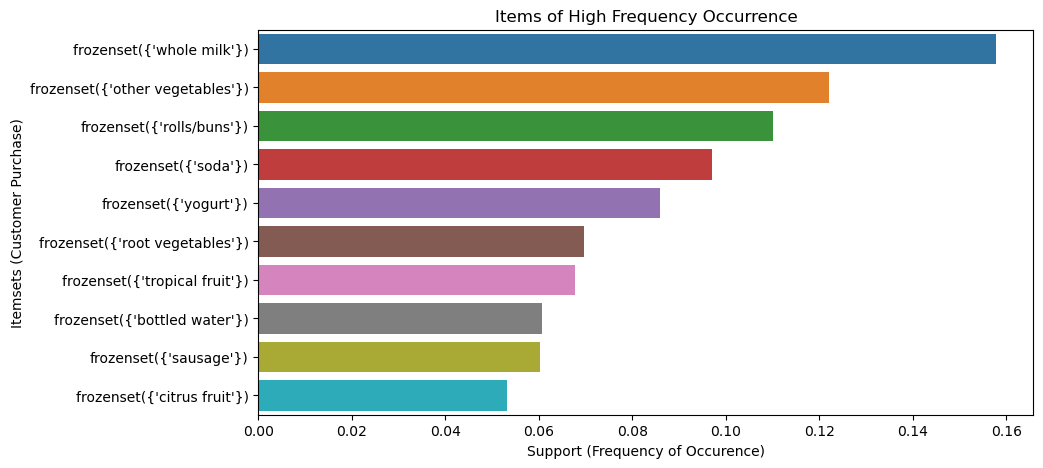

In [33]:
# i. Visualisation to show 'support metrics' of frequently purchased itemsets

best_items = frequent_purchase_items.nlargest(10, 'support')
plt.figure(figsize=(10, 5))
sns.barplot(x='support', y='itemsets', data=best_items)
plt.title('Items of High Frequency Occurrence')
plt.xlabel('Support (Frequency of Occurence)')
plt.ylabel('Itemsets (Customer Purchase)')

In [ ]:
# j1. Recommendations for itemsets based on frequency of purchase from above visualisation

#i. Whole milk ranks as top 'antecedent' purchase with a total sum of 2363 occurences and support metric of 0.157923 . This indicates that most customers purchase milk as an integral item in their grocery list.

#ii. Based on the above table metrics/sorting, the items 'other vegetables', 'rolls/buns' as well as 'soda' are highly recommended to be placed at close proximity to the whole milk shelf as they are the most probable items to be placed into the customer's basket.


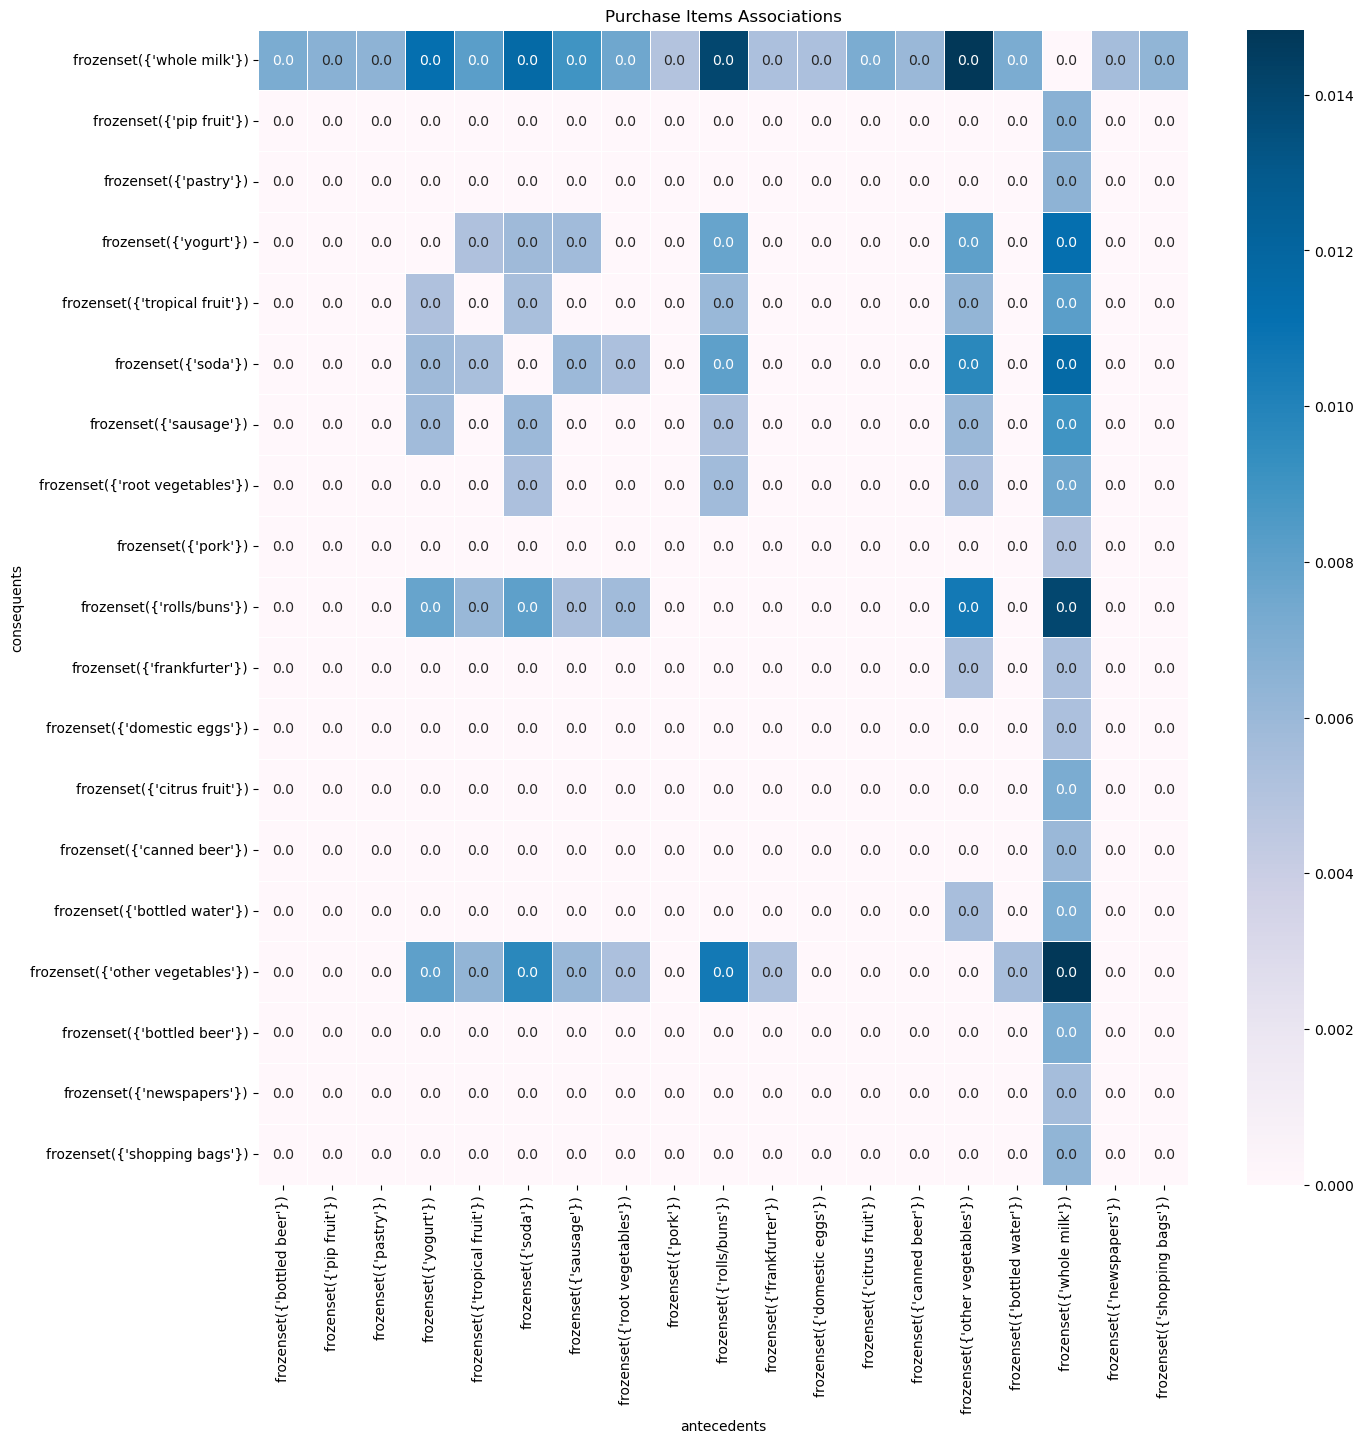

In [32]:
# k2. Reshape the data by transforming some of the metrics (antecedent, consequent and support columns) into a matrix
# Using 'support' as values

support_table = frequent_purchase_items_ar.pivot(index ='consequents', columns = 'antecedents', values = 'support').fillna(0)

# k2a. Creating a heatmap by passing the matrix generated
plt.figure(figsize=(15, 15))
sns.heatmap(support_table, annot = True, cmap = 'PuBu', fmt = ".1f", linewidths = .5)
plt.title('Purchase Items Associations')
plt.show()

In [ ]:
# k3. Interpreting the above heatmap viz in order to the understand frequent purchase items and make recommendations.

#i. Predicting associations from the above heatmap is a bit difficult as the mining of association rules for the above itemsets indicate'negatives' on the zhang metric column

#ii. The color intensity however indicates degree of support; darker shade indicating 'higher support' for the itemsets in comparism to others.

#iii. The purchase itemsets with 'high support' include whole milk, rolls/buns and other vegetables; if 'whole milk', then 'rolls & buns' or 'other vegetables'.

#iv. These high support items will do well when placed in close proximity to each other on the shelves as they are likely to be bought together.

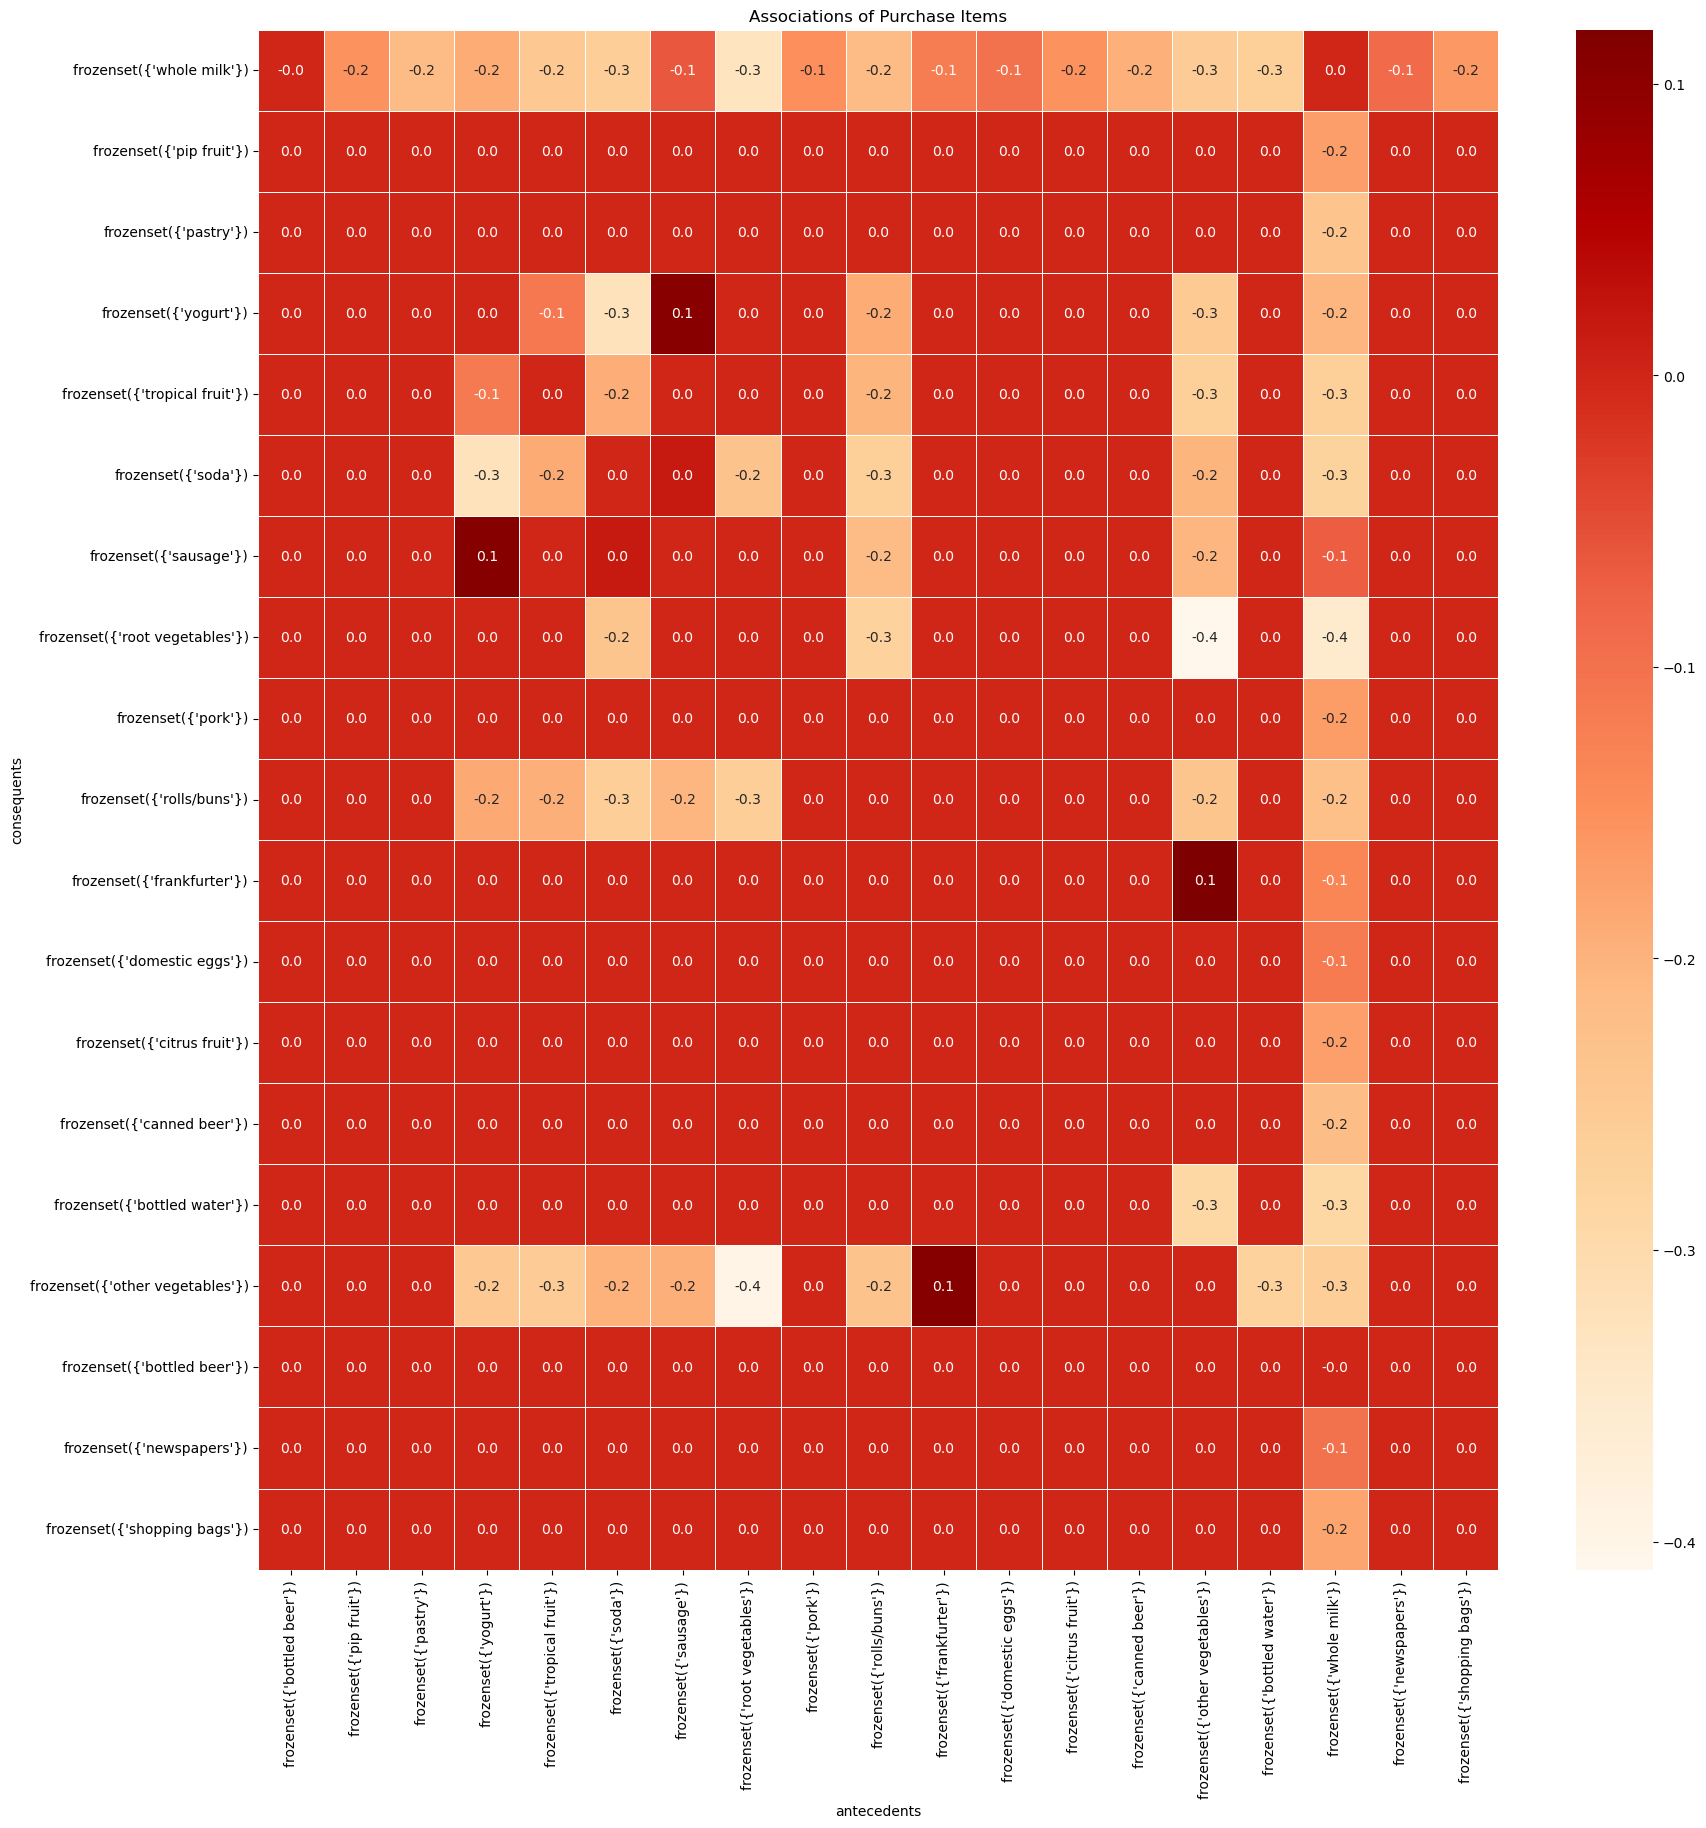

In [30]:
# l. Reshape the data by transforming some of the metrics (antecedent, consequent and support columns) into a matrix
# Using 'zhangs_metric' as values

purchase_items_associations = frequent_purchase_items_ar2.pivot(index ='consequents', columns = 'antecedents', values = 'zhangs_metric').fillna(0)

# l2a. Creating a heatmap by passing the matrix generated
plt.figure(figsize=(20, 20))
sns.heatmap(purchase_items_associations, annot = True, cmap = 'OrRd', fmt = ".1f", linewidths = .5)
plt.title('Associations of Purchase Items')
plt.show()

In [ ]:
# l3. Interpreting the above heatmap viz in order to the understand possible pairings and hence make recommendations.

#i. Using the zhangs metric, it is easier to visualise itemsets with 'positive associations' as a result of their positive values. 

#ii. The itemsets with darker color intensity indicate the association rules with positive values in the zhangs metric column.

#iii. These itemsets include yoghurt, sausage, frankfurter and other vegetables respectively; if 'yoghurt' then 'sausage' and if 'frankfurter' then 'other vegetables'. .

#iv. This means buying one predicts buying the other, hence they are likely to do well when placed in close proximity to each other on the shelves as they complement each other.

#v. Itemsets as whole milk and beer on the other hand for example have negative zhangs' values and hence indicate dissociation.